In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("./Music-Recommendation-System/Dataset/spotify_millsongdata.csv")

In [95]:
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [6]:
df.shape

(57650, 4)

In [5]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [7]:
df = df.sample(3000).drop('link', axis=1).reset_index(drop=True)

In [ ]:
import requests

# Spotify API credentials
CLIENT_ID = 0#client_id
CLIENT_SECRET = 0#secret_key

def get_spotify_token():
    url = 'https://accounts.spotify.com/api/token'
    headers = {
        'Content-Type': 'application/x-www-form-urlencoded'
    }
    data = {
        'grant_type': 'client_credentials',
        'client_id': CLIENT_ID,
        'client_secret': CLIENT_SECRET
    }
    response = requests.post(url, headers=headers, data=data)
    response_data = response.json()
    return response_data['access_token']

# Get token
spotify_token = get_spotify_token()
print(f"Access Token: {spotify_token}")

counter= 0

def search_song(song, artist, token):
    global counter
    url = 'https://api.spotify.com/v1/search'
    headers = {
        'Authorization': f'Bearer {token}'
    }
    params = {
        'q': f'track:{song} artist:{artist}',  # Search query with song and artist
        'type': 'track',
        'limit': 1  # Retrieve only the top result
    }
    response = requests.get(url, headers=headers, params=params)
    response_data = response.json()
    
    if 'tracks' in response_data and response_data['tracks']['items']:
        track = response_data['tracks']['items'][0]
        print(track['id'])
        counter += 1  # Increment counter
        print(f"Processed Song Count: {counter}")
        return {
            'song_id': track['id'],
            'popularity': track['popularity'],
        }
    else:
        return None


# Search for a song
# df['song_data'] = df.apply(
#     lambda row: search_song(row['song'], row['artist'], spotify_token),
#     axis=1
# )

search_song('Happiness Is A Thing Called Joe', 'Ella Fitzgerald', spotify_token)


# song_data_df = pd.json_normalize(df['song_data'])
# df = pd.concat([df, song_data_df], axis=1)

# # Use popularity as a feature now
# print(songs_df[['track_id','popularity']])

# df.to_csv('updated_songs_with_id.csv', index=False)

# # Print updated DataFrame
# print(songs_df)


Access Token: BQCIQZe-YeOH1sz9cSaxKJTM121_HMA_mUNCzfeBTChw4Lh4PuyFTQFCIGgnrZfuLv3KHu8OJLWzLLkjjavCBGdrh3_0X2PiVoEUy-6u9GQGv6YZfkw
6dy6iJLDPWYlYIJLNfIjYJ
Processed Song Count: 1


{'song_id': '6dy6iJLDPWYlYIJLNfIjYJ', 'popularity': 6}

In [43]:
import re

expression = "{'song_id': '6dy6iJLDPWYlYIJLNfIjYJ', 'song_name': 'Some Song'}"

# Now apply regex to extract the song_id
song_id = re.search(r"'song_id': '([^']+)'", expression).group(1) if re.search(r"'song_id': '([^']+)'", expression) else None
print(song_id)


6dy6iJLDPWYlYIJLNfIjYJ


In [38]:
df.head(5)

,artist,song,text,song_id
0,Ella Fitzgerald,Happiness Is A Thing Called Joe,It seem like happiness is jus' a thing called ...,"{'song_id': '6dy6iJLDPWYlYIJLNfIjYJ', 'song_na..."
1,Barbra Streisand,At The Same Time,Think of all the hearts \r\nBeating in the wo...,"{'song_id': '0SdtnLzfhMnIsGcmhr6ac8', 'song_na..."
2,Chaka Khan,Clouds,Clouds \r\nDifferent shapes and sizes \r\nHi...,"{'song_id': '1opSxQP8KkdKOGvbvlmuIV', 'song_na..."
3,Weird Al Yankovic,Bob,"I, man, am regal a German am I \r\nNever odd ...","{'song_id': '2deME7JS3NAKCVJqm1l0Vs', 'song_na..."
4,"Harry Connick, Jr.",Something Was Missing,I've made me a fortune \r\n(That fortune made...,"{'song_id': '6UVM7drZAN6oteWCdqtHAp', 'song_na..."


In [45]:
def extract_song_id(expression):
    # Ensure the expression is a string before applying regex
    expression_str = str(expression)
    match = re.search(r"'song_id': '([^']+)'", expression_str)
    return match.group(1) if match else None

# Apply the function to the 'song_id' column
df['extracted_song_id'] = df['song_id'].apply(extract_song_id)

# Save the updated DataFrame to a CSV file
df.to_csv('updated_songs_with_extracted_ids.csv', index=False)

# Display the updated DataFrame
print(df)

                  artist                             song  \
0        Ella Fitzgerald  Happiness Is A Thing Called Joe   
1       Barbra Streisand                 At The Same Time   
2             Chaka Khan                           Clouds   
3      Weird Al Yankovic                              Bob   
4     Harry Connick, Jr.            Something Was Missing   
...                  ...                              ...   
2995        King Crimson                        Heartbeat   
2996          Air Supply               Stars In Your Eyes   
2997        Janis Joplin                Flower In The Sun   
2998         Wiz Khalifa                         Fly solo   
2999                Devo                    Pink Pussycat   

                                                   text  \
0     It seem like happiness is jus' a thing called ...   
1     Think of all the hearts  \r\nBeating in the wo...   
2     Clouds  \r\nDifferent shapes and sizes  \r\nHi...   
3     I, man, am regal a German

In [48]:
df = df.drop(columns=['song_id'])

# Save the updated DataFrame to a CSV file
df.to_csv('updated_songs_with_req_id.csv', index=False)

In [51]:
import random
num_users = 100  # Assume we have 100 unique users
df['user_id'] = [f'user_{random.randint(1, num_users)}' for _ in range(len(df))]

# Generate synthetic listen_count (random number between 1 and 100)
df['listen_count'] = [random.randint(1, 100) for _ in range(len(df))]

# Save the updated DataFrame to a CSV file
df.to_csv('updated_songs_with_synthetic_data.csv', index=False)

# Display the updated DataFrame
print(df)

                  artist                             song  \
0        Ella Fitzgerald  Happiness Is A Thing Called Joe   
1       Barbra Streisand                 At The Same Time   
2             Chaka Khan                           Clouds   
3      Weird Al Yankovic                              Bob   
4     Harry Connick, Jr.            Something Was Missing   
...                  ...                              ...   
2995        King Crimson                        Heartbeat   
2996          Air Supply               Stars In Your Eyes   
2997        Janis Joplin                Flower In The Sun   
2998         Wiz Khalifa                         Fly solo   
2999                Devo                    Pink Pussycat   

                                                   text  \
0     It seem like happiness is jus' a thing called ...   
1     Think of all the hearts  \r\nBeating in the wo...   
2     Clouds  \r\nDifferent shapes and sizes  \r\nHi...   
3     I, man, am regal a German

In [108]:
import random
fd = pd.read_csv("./updated_songs_with_req_id.csv")

print(fd)

num_users = 1000  # Assume there are 1000 unique users
min_songs_per_user = 16  # Minimum songs a user should listen to
max_listen_count = 100  # Maximum listen count for any song

# Step 1: Assign user_id to each row
fd["user_id"] = [f"user_{random.randint(1, num_users)}" for _ in range(len(df))]

# Step 2: Generate listen_count for each row
fd["listen_count"] = [random.randint(1, max_listen_count) for _ in range(len(df))]

# Step 3: Ensure users meet the minimum song threshold
# user_song_counts = df.groupby("user_id").size()
# valid_users = user_song_counts[user_song_counts >= min_songs_per_user].index
# fd = fd[fd["user_id"].isin(valid_users)]


                  artist                             song  \
0        Ella Fitzgerald  Happiness Is A Thing Called Joe   
1       Barbra Streisand                 At The Same Time   
2             Chaka Khan                           Clouds   
3      Weird Al Yankovic                              Bob   
4     Harry Connick, Jr.            Something Was Missing   
...                  ...                              ...   
2995        King Crimson                        Heartbeat   
2996          Air Supply               Stars In Your Eyes   
2997        Janis Joplin                Flower In The Sun   
2998         Wiz Khalifa                         Fly solo   
2999                Devo                    Pink Pussycat   

                                                   text  \
0     It seem like happiness is jus' a thing called ...   
1     Think of all the hearts  \r\nBeating in the wo...   
2     Clouds  \r\nDifferent shapes and sizes  \r\nHi...   
3     I, man, am regal a German

In [109]:
fd

,artist,song,text,extracted_song_id,user_id,listen_count
0,Ella Fitzgerald,Happiness Is A Thing Called Joe,It seem like happiness is jus' a thing called ...,6dy6iJLDPWYlYIJLNfIjYJ,user_206,76
1,Barbra Streisand,At The Same Time,Think of all the hearts \r\nBeating in the wo...,0SdtnLzfhMnIsGcmhr6ac8,user_975,66
2,Chaka Khan,Clouds,Clouds \r\nDifferent shapes and sizes \r\nHi...,1opSxQP8KkdKOGvbvlmuIV,user_231,93
3,Weird Al Yankovic,Bob,"I, man, am regal a German am I \r\nNever odd ...",2deME7JS3NAKCVJqm1l0Vs,user_837,5
4,"Harry Connick, Jr.",Something Was Missing,I've made me a fortune \r\n(That fortune made...,6UVM7drZAN6oteWCdqtHAp,user_248,32
...,...,...,...,...,...,...
2995,King Crimson,Heartbeat,I need to feel your heartbeat heartbeat \r\nS...,5esztZeiWJF8dYixCubgai,user_435,27
2996,Air Supply,Stars In Your Eyes,We are civilized and free from all confusion ...,2kul5Vj85iJV57lOZ25vS2,user_95,73
2997,Janis Joplin,Flower In The Sun,Oh please don't you think baby that I am wrong...,3O59UWV5NDKZ6Td64Acpzv,user_208,32
2998,Wiz Khalifa,Fly solo,[Chorus] \r\nI had a dream that the whole wor...,6qa6a2fsCbLMkSIoZEfvTJ,user_53,58


In [4]:
import pandas as pd
import random

# Load your existing dataset (3000 rows)
fd = pd.read_csv("./updated_songs_with_synthetic_data.csv")  # Replace with your actual file

# Parameters
# num_users = 500  # Total unique users
# min_songs_per_user = 16  # Minimum songs a user must listen to
# max_listen_count = 100  # Maximum listen count for any song

# # Step 1: Generate a list of user_ids ensuring minimum song requirements
# user_ids = []
# while len(user_ids) < len(fd):
#     # Add each user at least 'min_songs_per_user' times
#     user_ids.extend([f"user_{i}" for i in range(1, num_users + 1)])

# # Trim to ensure exactly the number of rows in the dataset
# user_ids = user_ids[:len(fd)]

# # Step 2: Shuffle user_ids to distribute randomly
# random.shuffle(user_ids)

# # Step 3: Generate random listen counts for each row
# listen_counts = [random.randint(1, max_listen_count) for _ in range(len(fd))]

# # Step 4: Assign the new 'user_id' and 'listen_count' columns to the existing DataFrame
# fd['user_id'] = user_ids
# fd['listen_count'] = listen_counts

# # Display statistics
# average_listen_count = df["listen_count"].mean()
# min_listen_count = df["listen_count"].min()
# max_listen_count = df["listen_count"].max()

# print(f"A song is listened to by an average of {average_listen_count:.2f} users, "
#       f"with minimum {min_listen_count} and maximum {max_listen_count} listens.")

# # Save the updated dataset to a CSV file
# # df.to_csv("updated_songs_with_synthetic_data.csv", index=False)
# print("Updated dataset saved to 'updated_songs_with_synthetic_data.csv'")

# Display the updated dataframe
print(fd.head())


               artist                             song  \
0     Ella Fitzgerald  Happiness Is A Thing Called Joe   
1    Barbra Streisand                 At The Same Time   
2          Chaka Khan                           Clouds   
3   Weird Al Yankovic                              Bob   
4  Harry Connick, Jr.            Something Was Missing   

                                                text       extracted_song_id  \
0  It seem like happiness is jus' a thing called ...  6dy6iJLDPWYlYIJLNfIjYJ   
1  Think of all the hearts  \r\nBeating in the wo...  0SdtnLzfhMnIsGcmhr6ac8   
2  Clouds  \r\nDifferent shapes and sizes  \r\nHi...  1opSxQP8KkdKOGvbvlmuIV   
3  I, man, am regal a German am I  \r\nNever odd ...  2deME7JS3NAKCVJqm1l0Vs   
4  I've made me a fortune  \r\n(That fortune made...  6UVM7drZAN6oteWCdqtHAp   

   user_id  listen_count  
0  user_69            63  
1  user_45            32  
2  user_92            99  
3  user_62            55  
4  user_99            90  


C:\Users\GAGAN\AppData\Local\Temp\ipykernel_11616\3881705954.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_user.values, color='blue')


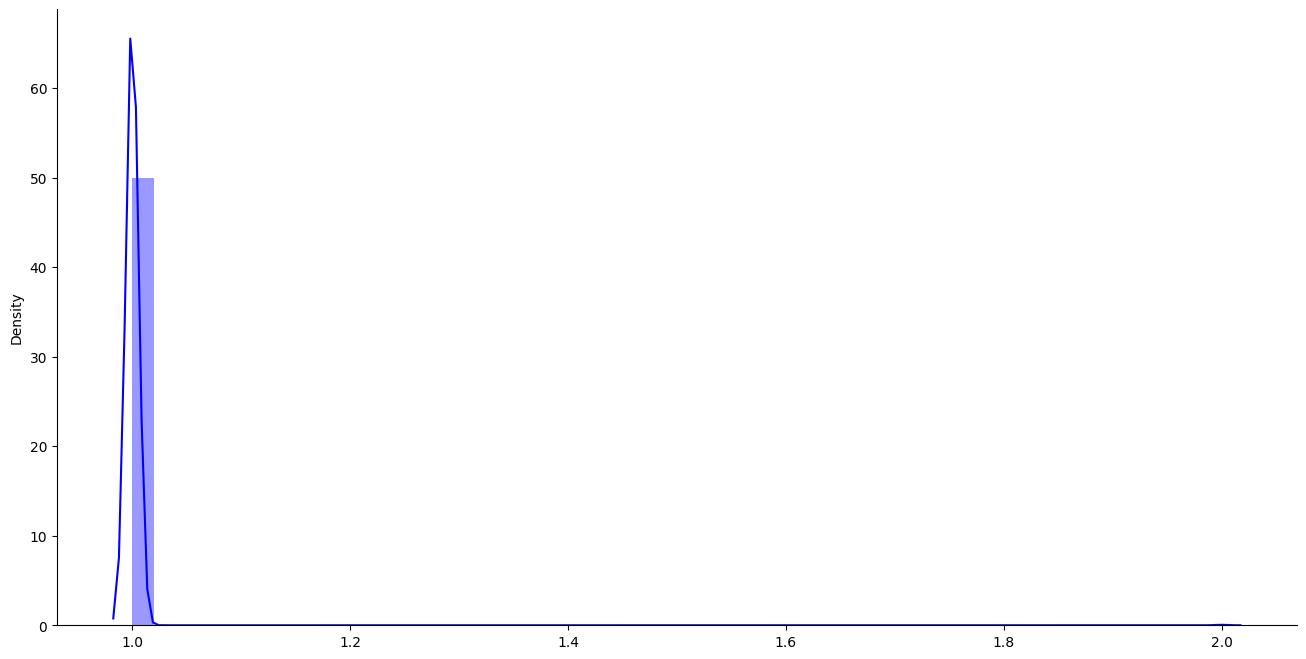

A song is listened for an average of 1.000777907429016 users, with minimum 1 and maximum 2 users


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
song_user = fd.groupby('extracted_song_id')['user_id'].count()
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();
print(f"A song is listened for an average of {np.mean(song_user)} users, with minimum {np.min(song_user)} and maximum {np.max(song_user)} users")

In [7]:
fd.tail(5)

,artist,song,text,extracted_song_id,user_id,listen_count
2995,King Crimson,Heartbeat,I need to feel your heartbeat heartbeat \r\nS...,5esztZeiWJF8dYixCubgai,user_99,56
2996,Air Supply,Stars In Your Eyes,We are civilized and free from all confusion ...,2kul5Vj85iJV57lOZ25vS2,user_41,20
2997,Janis Joplin,Flower In The Sun,Oh please don't you think baby that I am wrong...,3O59UWV5NDKZ6Td64Acpzv,user_45,8
2998,Wiz Khalifa,Fly solo,[Chorus] \r\nI had a dream that the whole wor...,6qa6a2fsCbLMkSIoZEfvTJ,user_31,97
2999,Devo,Pink Pussycat,Pink pussycat \r\nWhere are you \r\nPink pus...,3Lfi3mdVytpWxe2SrGBN1b,user_2,39


In [100]:
df['text'][0]

"Woman, she's moving to the weight of the world  \r\nMomma, she's carrying the weight of the world  \r\nAll the time she breathing in the weight of the world  \r\n  \r\n[Chorus]  \r\nBring it on home  \r\nBring the soup on home  \r\n  \r\nWell, poppa, too, he got the weight of the world  \r\nMan is moving in to the weight of the world  \r\nAnd all the time, along with the soup he's bringing home  \r\nThe weight of the world  \r\n  \r\n[Chorus]  \r\n  \r\nChildren, too, fall to this weight of the world  \r\nAll the time they they fall, right there into the weight  \r\nAnd all the time they're trying to shake  \r\nThe weight of the world  \r\n  \r\n[Chorus]  \r\n  \r\nEverybody's going to the wake of the world  \r\nWe're all dressing up fine for the wake of the world  \r\nAnd everybody's hiding behind trees, breathing loud  \r\nThe weight of the world  \r\n  \r\n[Chorus]\r\n\r\n"

In [8]:
fd.shape
fd['text'] = fd['text'].str.lower().replace(r'^\w\n',' ').replace('\n',' ', regex=True)
fd

,artist,song,text,extracted_song_id,user_id,listen_count
0,Ella Fitzgerald,Happiness Is A Thing Called Joe,it seem like happiness is jus' a thing called ...,6dy6iJLDPWYlYIJLNfIjYJ,user_69,63
1,Barbra Streisand,At The Same Time,think of all the hearts \r beating in the wor...,0SdtnLzfhMnIsGcmhr6ac8,user_45,32
2,Chaka Khan,Clouds,clouds \r different shapes and sizes \r hidi...,1opSxQP8KkdKOGvbvlmuIV,user_92,99
3,Weird Al Yankovic,Bob,"i, man, am regal a german am i \r never odd o...",2deME7JS3NAKCVJqm1l0Vs,user_62,55
4,"Harry Connick, Jr.",Something Was Missing,i've made me a fortune \r (that fortune made ...,6UVM7drZAN6oteWCdqtHAp,user_99,90
...,...,...,...,...,...,...
2995,King Crimson,Heartbeat,i need to feel your heartbeat heartbeat \r so...,5esztZeiWJF8dYixCubgai,user_99,56
2996,Air Supply,Stars In Your Eyes,we are civilized and free from all confusion ...,2kul5Vj85iJV57lOZ25vS2,user_41,20
2997,Janis Joplin,Flower In The Sun,oh please don't you think baby that i am wrong...,3O59UWV5NDKZ6Td64Acpzv,user_45,8
2998,Wiz Khalifa,Fly solo,[chorus] \r i had a dream that the whole worl...,6qa6a2fsCbLMkSIoZEfvTJ,user_31,97


In [9]:
fd['text'].apply(lambda x: token(x))

NameError: name 'token' is not defined

In [55]:
df.head(5)

,artist,song,text,extracted_song_id,user_id,listen_count
0,Ella Fitzgerald,Happiness Is A Thing Called Joe,It seem like happiness is jus' a thing called ...,6dy6iJLDPWYlYIJLNfIjYJ,user_69,63
1,Barbra Streisand,At The Same Time,Think of all the hearts \r\nBeating in the wo...,0SdtnLzfhMnIsGcmhr6ac8,user_45,32
2,Chaka Khan,Clouds,Clouds \r\nDifferent shapes and sizes \r\nHi...,1opSxQP8KkdKOGvbvlmuIV,user_92,99
3,Weird Al Yankovic,Bob,"I, man, am regal a German am I \r\nNever odd ...",2deME7JS3NAKCVJqm1l0Vs,user_62,55
4,"Harry Connick, Jr.",Something Was Missing,I've made me a fortune \r\n(That fortune made...,6UVM7drZAN6oteWCdqtHAp,user_99,90


In [103]:
df

,artist,song,text
0,Widespread Panic,Weight Of The World,"Woman, she's moving to the weight of the world..."
1,Les Miserables,The Bargain,[Valjean and Young Cosette arrive at the now e...
2,America,Chasing The Rainbow,Sat here thinking about my heart \r\nAll of t...
3,U2,Love Rescue Me,Love rescue me \r\nCome forth and speak to me...
4,Emmylou Harris,J'ai Fait Tout,"J'ai fait tout, j'ai fait tout \r\nCe que j'a..."
...,...,...,...
2995,Devo,Time Out For Fun,"Hello, \r\n \r\nThis is devo \r\nWe would l..."
2996,Neil Young,Danger Bird,"Danger bird, he flies alone \r\nAnd he rides ..."
2997,Yelawolf,The Last Song,Everybody's asking me lately where I'm from \...
2998,Allman Brothers Band,Mean Woman Blues,"Well I love you baby, but you won't give me th..."


In [56]:
df['text'] = df['text'].str.lower().replace(r'^\w\n',' ').replace('\n',' ', regex=True)

In [57]:
df

,artist,song,text,extracted_song_id,user_id,listen_count
0,Ella Fitzgerald,Happiness Is A Thing Called Joe,it seem like happiness is jus' a thing called ...,6dy6iJLDPWYlYIJLNfIjYJ,user_69,63
1,Barbra Streisand,At The Same Time,think of all the hearts \r beating in the wor...,0SdtnLzfhMnIsGcmhr6ac8,user_45,32
2,Chaka Khan,Clouds,clouds \r different shapes and sizes \r hidi...,1opSxQP8KkdKOGvbvlmuIV,user_92,99
3,Weird Al Yankovic,Bob,"i, man, am regal a german am i \r never odd o...",2deME7JS3NAKCVJqm1l0Vs,user_62,55
4,"Harry Connick, Jr.",Something Was Missing,i've made me a fortune \r (that fortune made ...,6UVM7drZAN6oteWCdqtHAp,user_99,90
...,...,...,...,...,...,...
2995,King Crimson,Heartbeat,i need to feel your heartbeat heartbeat \r so...,5esztZeiWJF8dYixCubgai,user_99,56
2996,Air Supply,Stars In Your Eyes,we are civilized and free from all confusion ...,2kul5Vj85iJV57lOZ25vS2,user_41,20
2997,Janis Joplin,Flower In The Sun,oh please don't you think baby that i am wrong...,3O59UWV5NDKZ6Td64Acpzv,user_45,8
2998,Wiz Khalifa,Fly solo,[chorus] \r i had a dream that the whole worl...,6qa6a2fsCbLMkSIoZEfvTJ,user_31,97


In [59]:
import nltk
from nltk.stem.porter import PorterStemmer
# nltk.download('punkt') 
# nltk.download('wordnet') 
# nltk.download('stopwords')

In [60]:
stemmer = PorterStemmer()

In [108]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\GAGAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [140]:
def token(txt):
    token = nltk.word_tokenize(txt)
    a = [stemmer.stem(w) for w in token]
    return " ".join(a)

In [62]:
token("you are beautiful, in wonderful of greatness")

'you are beauti , in wonder of great'

In [141]:
fd['text'].apply(lambda x: token(x))

0       it seem like happi is ju ' a thing call joe he...
1       think of all the heart beat in the world at th...
2       cloud differ shape and size hide the horizon c...
3       i , man , am regal a german am i never odd or ...
4       i 've made me a fortun ( that fortun made ten ...
                              ...                        
2995    i need to feel your heartbeat heartbeat so clo...
2996    we are civil and free from all confus and yet ...
2997    oh pleas do n't you think babi that i am wrong...
2998    [ choru ] i had a dream that the whole world w...
2999    pink pussycat where are you pink pussycat i 'm...
Name: text, Length: 3000, dtype: object

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [143]:
tfid = TfidfVectorizer(analyzer='word', stop_words='english')

In [144]:
matrix = tfid.fit_transform(df['text'])

In [145]:
similar = cosine_similarity(matrix)

In [146]:
similar[0]

array([1.        , 0.01608367, 0.01231424, ..., 0.01607081, 0.04210523,
       0.00364936])

In [69]:
df[df['song']=='Weight Of The World'].index[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [70]:
def recommender (song_name):
    idx = df[df['song']== song_name].index[0]
    distance = sorted(list(enumerate(similar[idx])), reverse=True, key = lambda x: x[1])
    song = []
    for s_id in distance[1:5]:
        song.append(df.iloc[s_id[0]].song)
    return song

In [72]:
recommender("Happiness Is A Thing Called Joe")

["I Keep Goin' Back To Joe's",
 'Gypsy, Joe And Me',
 'Hey Joe',
 'Little Did We Know']

In [73]:
import pickle

In [147]:
pickle.dump(similar, open("similar_needed", "wb"))

In [148]:
pickle.dump(fd, open("required_fd", "wb"))

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from scipy.sparse import csr_matrix

In [12]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [13]:
from scipy.sparse import csr_matrix

In [14]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [15]:
song_user = fd.groupby('extracted_song_id')['user_id'].count()

C:\Users\GAGAN\AppData\Local\Temp\ipykernel_11616\3754302880.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_user.values, color='blue')


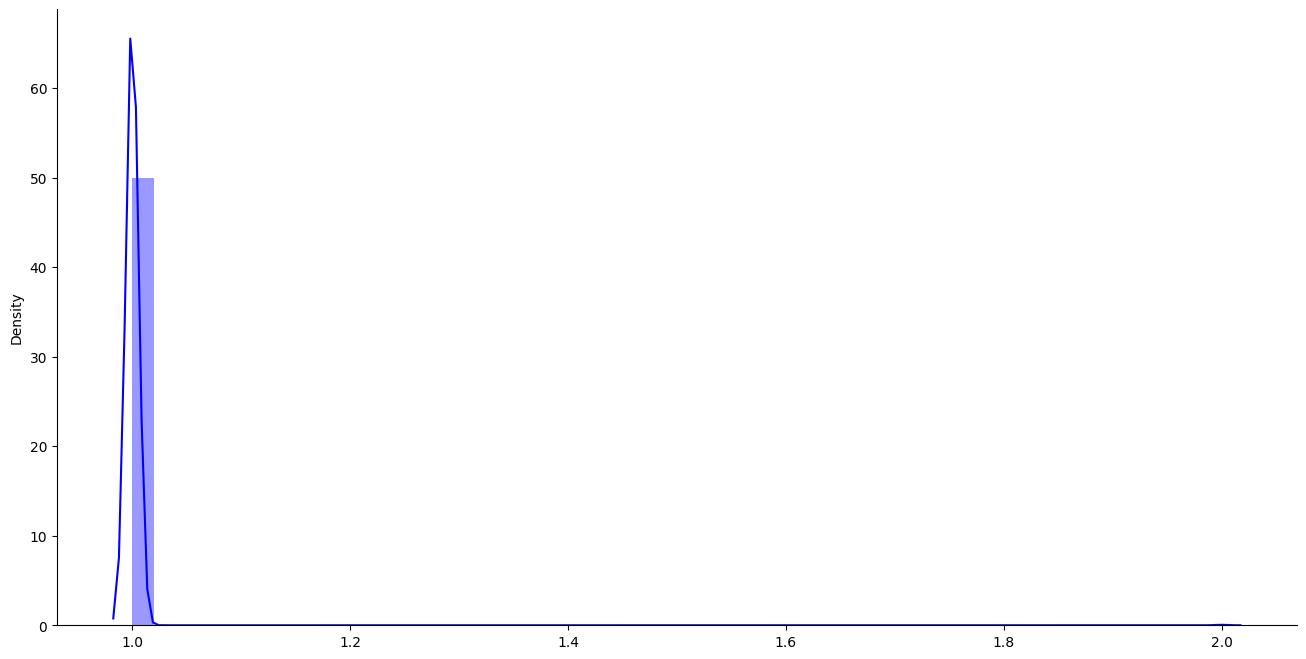

In [16]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [17]:
print(f"A song is listened for an average of {np.mean(song_user)} users, with minimum {np.min(song_user)} and maximum {np.max(song_user)} users")

A song is listened for an average of 1.000777907429016 users, with minimum 1 and maximum 2 users


In [18]:
fd.shape

(3000, 6)

In [19]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214]
fd

,artist,song,text,extracted_song_id,user_id,listen_count
0,Ella Fitzgerald,Happiness Is A Thing Called Joe,it seem like happiness is jus' a thing called ...,6dy6iJLDPWYlYIJLNfIjYJ,user_69,63
1,Barbra Streisand,At The Same Time,think of all the hearts \r beating in the wor...,0SdtnLzfhMnIsGcmhr6ac8,user_45,32
2,Chaka Khan,Clouds,clouds \r different shapes and sizes \r hidi...,1opSxQP8KkdKOGvbvlmuIV,user_92,99
3,Weird Al Yankovic,Bob,"i, man, am regal a german am i \r never odd o...",2deME7JS3NAKCVJqm1l0Vs,user_62,55
4,"Harry Connick, Jr.",Something Was Missing,i've made me a fortune \r (that fortune made ...,6UVM7drZAN6oteWCdqtHAp,user_99,90
...,...,...,...,...,...,...
2995,King Crimson,Heartbeat,i need to feel your heartbeat heartbeat \r so...,5esztZeiWJF8dYixCubgai,user_99,56
2996,Air Supply,Stars In Your Eyes,we are civilized and free from all confusion ...,2kul5Vj85iJV57lOZ25vS2,user_41,20
2997,Janis Joplin,Flower In The Sun,oh please don't you think baby that i am wrong...,3O59UWV5NDKZ6Td64Acpzv,user_45,8
2998,Wiz Khalifa,Fly solo,[chorus] \r i had a dream that the whole worl...,6qa6a2fsCbLMkSIoZEfvTJ,user_31,97


In [20]:
fd['listen_count'] = pd.cut(fd['listen_count'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [21]:
listen_counts = pd.DataFrame(fd.groupby('listen_count').size(), columns=['count']).reset_index(drop=False)

C:\Users\GAGAN\AppData\Local\Temp\ipykernel_11616\3232565899.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  listen_counts = pd.DataFrame(fd.groupby('listen_count').size(), columns=['count']).reset_index(drop=False)


C:\Users\GAGAN\AppData\Local\Temp\ipykernel_11616\2503496354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='listen_count', y='count', palette='Set3', data=listen_counts)


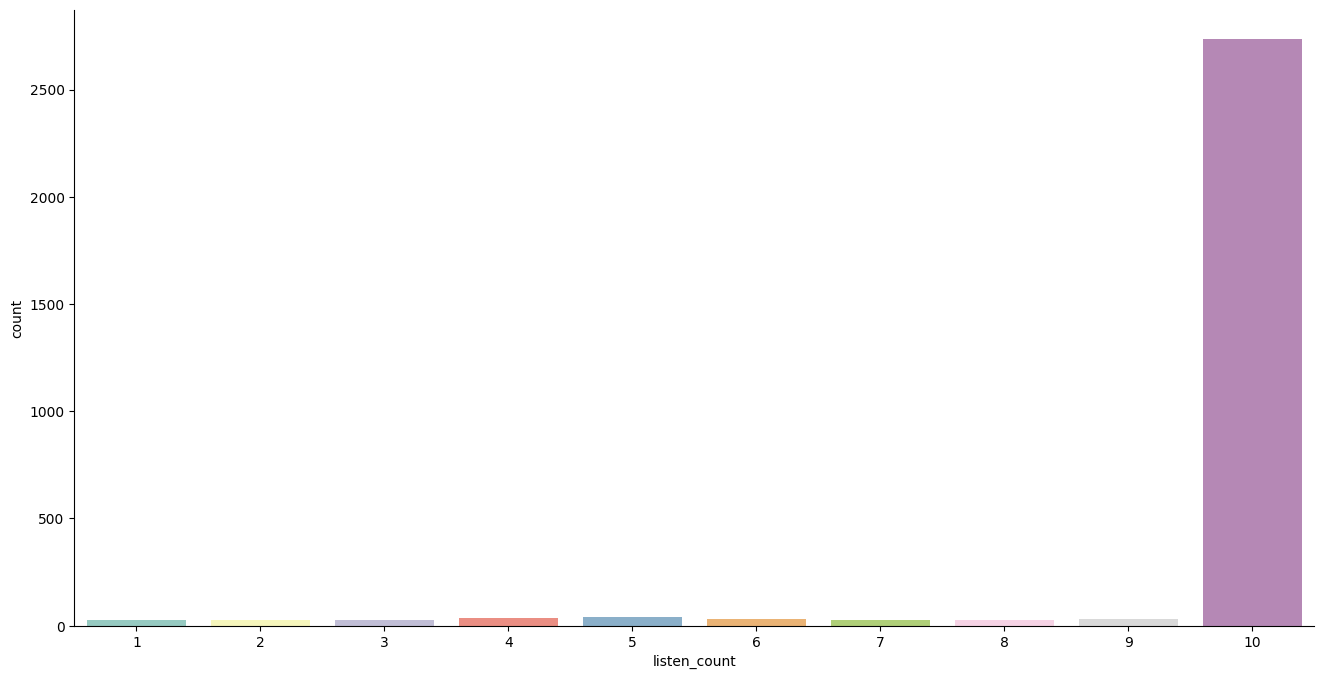

In [22]:
plt.figure(figsize=(16, 8))
sns.barplot(x='listen_count', y='count', palette='Set3', data=listen_counts)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();


In [23]:
# fd
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(fd[['user_id', 'extracted_song_id', 'listen_count']], reader)

In [24]:
trainset, testset = train_test_split(data, test_size=.25)

In [25]:
trainset, testset = train_test_split(data, test_size=.25)

In [26]:
param_grid = {'n_factors': [160], 
              'n_epochs': [100], 
              'lr_all': [0.001, 0.005],
              'reg_all': [0.08, 0.1]}

In [27]:
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=4, n_jobs=-2)


In [28]:
# find the best parameters for the model
grid_search_svd.fit(data)
find_algo = grid_search_svd.best_estimator['rmse']
print(grid_search_svd.best_score['rmse'])
print(grid_search_svd.best_params['rmse'])

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


1.5966614558020324
{'n_factors': 160, 'n_epochs': 100, 'lr_all': 0.005, 'reg_all': 0.1}


[Parallel(n_jobs=-2)]: Done  12 out of  12 | elapsed:    1.2s finished


In [29]:
# Perform the cross validation
cross_validate(find_algo, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6045  1.6245  1.6084  1.6317  1.6054  1.6149  0.0111  
Fit time          0.43    0.43    0.44    0.42    0.43    0.43    0.01    
Test time         0.00    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([1.60452672, 1.62448394, 1.60839526, 1.63171425, 1.60539426]),
 'fit_time': (0.43402910232543945,
  0.4296395778656006,
  0.4416999816894531,
  0.41681957244873047,
  0.42972826957702637),
 'test_time': (0.004983186721801758,
  0.0069980621337890625,
  0.0059967041015625,
  0.00699615478515625,
  0.006008148193359375)}

In [32]:
final_algorithm = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")

RMSE: 1.7383
The RMSE is 1.7382766464000667


In [33]:
import pickle

# Save the trained model to a file
with open('final_colaborative_music_recommender_model.pkl', 'wb') as model_file:
    pickle.dump(final_algorithm, model_file)

print("Model saved successfully.")

Model saved successfully.
